### Use this data to create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
#Checking column headings
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


#### Feature Engineering

In [6]:
# Taking a closer look at null values across columns
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [12]:
# Further exploring columns by data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [14]:
# Dropping BuildingArea completely and the nans for a number of other columns

features = df.drop(['BuildingArea', 'Date'], axis=1)
features = features.dropna(subset=['Lattitude', 'Longtitude', 'YearBuilt', 
                                   'Price', 'Landsize', 'Car', 'Bathroom', 'Bedroom2'])
features.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

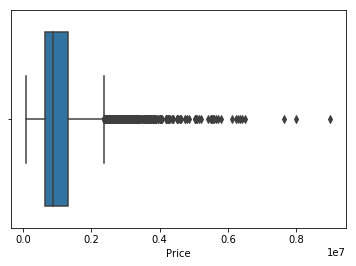

In [15]:
# Let's visualize price
sns.boxplot(features['Price'])

In [16]:
# Quite a few outliers in terms of price - let's take a look at the top 10 most expensive houses
print(np.sort(features.Price)[-10:])

[5800000. 6125000. 6250000. 6300000. 6370000. 6400000. 6500000. 7650000.
 8000000. 9000000.]


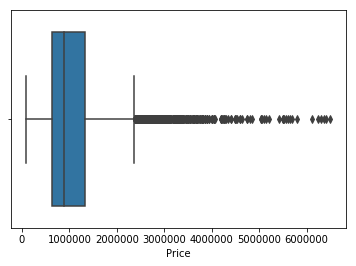

In [17]:
# Let's remove the top 3 values from the feature set
features = features[features.Price < 6500001.0]
sns.boxplot(features['Price'])

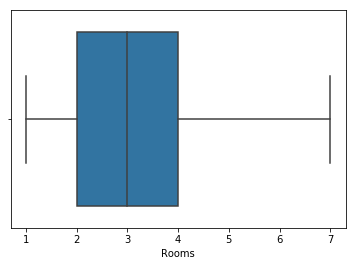

In [21]:
#Same concept as above, except for rooms
features = features[features.Rooms < 8]
sns.boxplot(features['Rooms'])

In [23]:
# Engineering a few more features
features['bed_over_bath'] = features['Bedroom2'] / features['Bathroom']

# I didn't realize that there would be instances of dividing by zero, so this won't end up being used
features['non_bed_baths'] = features['Rooms'] - (features['Bedroom2'] + features['Bathroom'])

features['landsize_over_price'] = features['Landsize'] / features['Price']
features.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,bed_over_bath,non_bed_baths,landsize_over_price
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2.0,-1.0,0.000151
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,...,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1.5,-2.0,0.000091
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,...,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,3.0,0.0,0.000075
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2.5,3067.0,4.0,...,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,2.0,-3.0,0.000131
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2.5,3067.0,2.0,...,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,2.0,-1.0,0.000156


                        Rooms     Price  Distance  Postcode  Bedroom2  \
Rooms                1.000000  0.497370  0.288701  0.079670  0.965582   
Price                0.497370  1.000000 -0.218373  0.050586  0.482628   
Distance             0.288701 -0.218373  1.000000  0.480048  0.294199   
Postcode             0.079670  0.050586  0.480048  1.000000  0.082481   
Bedroom2             0.965582  0.482628  0.294199  0.082481  1.000000   
Bathroom             0.620258  0.479150  0.129929  0.112694  0.621017   
Car                  0.407381  0.216766  0.262718  0.054997  0.412505   
Landsize             0.089129  0.058051  0.113584  0.061885  0.088606   
YearBuilt           -0.016398 -0.330040  0.297317  0.085321 -0.006369   
Lattitude            0.022929 -0.221036 -0.063228 -0.222377  0.026115   
Longtitude           0.086289  0.205528  0.178813  0.372112  0.085873   
Propertycount       -0.083901 -0.059039 -0.013503  0.032867 -0.081974   
bed_over_bath        0.192784 -0.066760  0.118350 -

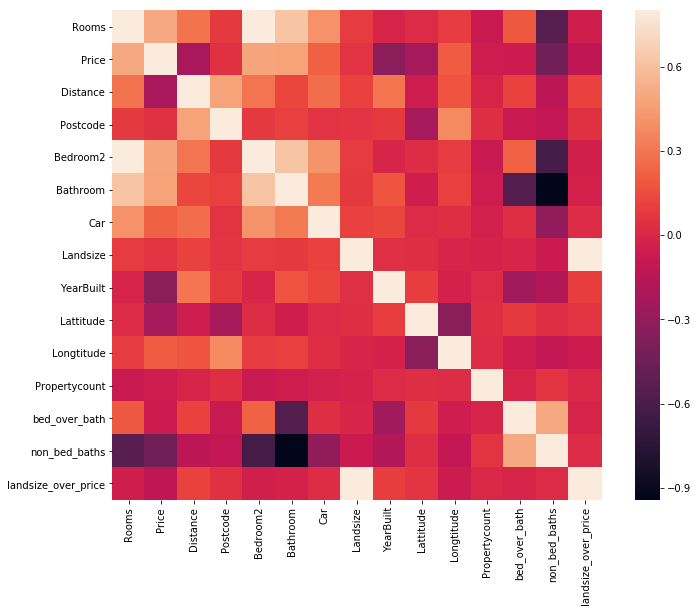

In [47]:
# Make a correlation matrix
corrmat = features.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Regression

In [48]:
features.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'bed_over_bath', 'non_bed_baths',
       'landsize_over_price'],
      dtype='object')

In [51]:
features.dtypes

Suburb                  object
Address                 object
Rooms                    int64
Type                    object
Price                  float64
Method                  object
SellerG                 object
Distance               float64
Postcode               float64
Bedroom2               float64
Bathroom               float64
Car                    float64
Landsize               float64
YearBuilt              float64
CouncilArea             object
Lattitude              float64
Longtitude             float64
Regionname              object
Propertycount          float64
bed_over_bath          float64
non_bed_baths          float64
landsize_over_price    float64
dtype: object

In [57]:
features.isnull().sum()

Suburb                 0
Address                0
Rooms                  0
Type                   0
Price                  0
Method                 0
SellerG                0
Distance               0
Postcode               0
Bedroom2               0
Bathroom               0
Car                    0
Landsize               0
YearBuilt              0
CouncilArea            0
Lattitude              0
Longtitude             0
Regionname             0
Propertycount          0
bed_over_bath          0
non_bed_baths          0
landsize_over_price    0
dtype: int64

In [59]:
features.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount,bed_over_bath,non_bed_baths,landsize_over_price
count,10449.000000,1.044900e+04,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,10449.000000,1.044900e+04,10449.000000,10449.000000
mean,3.052732,1.081099e+06,11.025065,3111.753756,3.034070,1.625610,1.675471,525.022490,1965.906307,-37.805819,144.993164,7504.382238,inf,-1.606948,0.000609
std,0.960552,6.643371e+05,6.696689,110.369027,0.960249,0.706253,0.971971,1088.602845,36.582627,0.089248,0.116306,4367.720247,NaN,0.750366,0.001620
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,249.000000,0.000000e+00,-13.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,200.000000,1950.000000,-37.858750,144.923510,4407.000000,1.500000e+00,-2.000000,0.000195
50%,3.000000,8.900000e+05,10.100000,3084.000000,3.000000,2.000000,2.000000,463.000000,1970.000000,-37.800900,144.999500,6567.000000,2.000000e+00,-2.000000,0.000378
75%,4.000000,1.330000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,1999.000000,-37.750700,145.063700,10331.000000,2.500000e+00,-1.000000,0.000701
max,7.000000,6.500000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,42800.000000,2019.000000,-37.407200,145.526350,21650.000000,inf,2.000000,0.063248


In [62]:
X_train = features[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
                   'Car', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude',
                   'Propertycount', 'non_bed_baths', 'landsize_over_price']]
Y_train = features['Price']

lass = linear_model.Lasso(alpha=1)
lassfit = lass.fit(X_train, Y_train)
print('R²:')
print(lass.score(X_train, Y_train))

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(lass, X_train, Y_train, cv=8)
print('\nCross validation:')
print(cross_val_score)

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates:')
print(origparams)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R²:
0.6014921772174536


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of


Cross validation:
[0.59199027 0.68521072 0.51321705 0.56325801 0.54332239 0.56355837
 0.54486716 0.60202461]

Parameter estimates:
[ 1.82904496e+05 -3.89752628e+04  7.52439369e+02  6.13121464e+04
  2.82295362e+05  5.98576769e+04  1.99832824e+02 -4.37442297e+03
 -1.14018152e+06  5.12189199e+05 -7.67500080e-01  3.71907881e+04
 -1.29264720e+08 -1.10864582e+08]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Random Forest Regressor

In [63]:
rfc = ensemble.RandomForestRegressor(n_estimators=300)

X = features[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
              'Car', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude',
              'Propertycount', 'non_bed_baths', 'landsize_over_price']]
Y = features['Price']

from sklearn.model_selection import cross_val_score

score = cross_val_score(rfc, X, Y, cv=5)
print(score)
print('Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

[0.94197066 0.92339248 0.93608636 0.96408897 0.96272449]
Accuracy: 0.95 (+/- 0.03)


In [66]:
rf_class = RandomForestClassifier()
rf_class.fit(X, Y)

feature_importances = pd.DataFrame(rf_class.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                     importance
Lattitude              0.139831
Longtitude             0.139513
landsize_over_price    0.121549
Landsize               0.119804
YearBuilt              0.108221
Distance               0.083720
Propertycount          0.078362
Postcode               0.068902
Car                    0.049554
Bedroom2               0.024774
Rooms                  0.024435
non_bed_baths          0.022217
Bathroom               0.019116
